<a href="https://colab.research.google.com/github/maitreya-v/Transfer-Learning-ResNet50V2-EfficientNetB0/blob/master/Fine_Tuning_EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-28 02:03:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.251.167.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  80.2MB/s    in 4.4s    

2023-06-28 02:04:02 (113 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import zipfile

zipref=zipfile.ZipFile("10_food_classes_all_data.zip")
zipref.extractall()
zipref.close()

In [3]:
import tensorflow as tf

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

train_datagen = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode = "categorical",
    batch_size = 32,
    image_size = (224,224)
)

test_datagen = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode = "categorical",
    batch_size = 32,
    image_size = (224,224)
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [4]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip(mode="horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

Text(0.5, 1.0, 'Augmented Image')

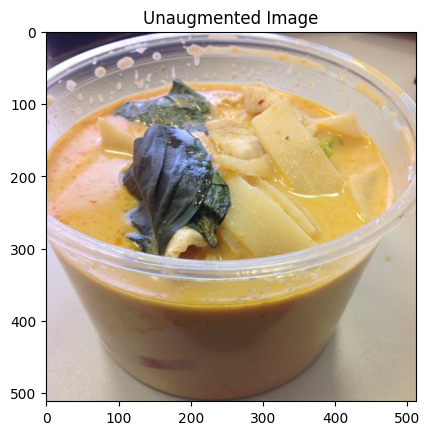

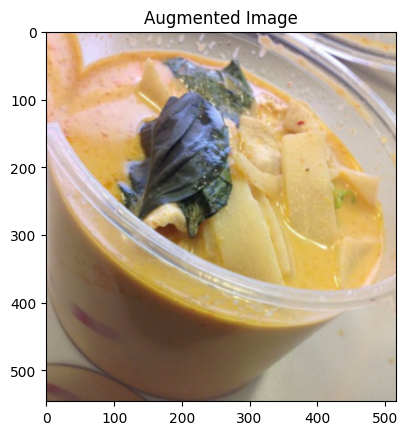

In [5]:
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dir_path = random.choice(os.listdir(train_dir))
img_path = random.choice(os.listdir(train_dir+"/"+dir_path))
final_img_path = train_dir+"/"+dir_path+"/"+img_path
img = mpimg.imread(final_img_path)/255.
plt.imshow(img)
plt.title("Unaugmented Image")

plt.figure()
augmented_image = data_augmentation(img,training=True)
plt.imshow(augmented_image)
plt.title("Augmented Image")

In [6]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top = False,
    weights = 'imagenet',
)

base_model.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [9]:
inputs = tf.keras.Input(shape=(224,224))

x = data_augmentation(inputs)

x = base_model(x,training=False)

outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputs,outputs)

TypeError: ignored